In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
TIME = "_size_vs_time.txt"
COMPARISONS = "_size_vs_comparisons.txt"

In [3]:
SORT = ["BubbleSort","SelectionSort","QuickSort","MergeSort"]

Algo_time = dict()
Algo_comp = dict()

for algo in SORT:
    time_path = algo + TIME
    comp_path = algo + COMPARISONS
    if algo not in Algo_time:
        Algo_time[algo] = []
    
    f1 = open(time_path,"r")
    data = f1.read().split("\n")[:-1]
    for passes in data:
        Algo_time[algo].append(passes.split())
    f1.close()
    
    if algo not in Algo_comp:
        Algo_comp[algo] = []
    f2 = open(comp_path,"r")
    data = f2.read().split("\n")[:-1]
    for passes in data:
        Algo_comp[algo].append(passes.split())
    f2.close()

In [4]:
sizes = set()
for algo in Algo_time:
    for passes in Algo_time[algo]:
        sizes.add(int(passes[0]))
sizes = list(sizes)
sizes.sort()

In [5]:
BubbleSort_time = pd.Series([float(x[1]) for x in Algo_time["BubbleSort"]],index=sizes,name="Bubble Sort")
SelectionSort_time = pd.Series([float(x[1]) for x in Algo_time["SelectionSort"]],index=sizes,name="Selection Sort")
QuickSort_time = pd.Series([float(x[1]) for x in Algo_time["QuickSort"]],index=sizes,name="Quick Sort")
MergeSort_time = pd.Series([float(x[1]) for x in Algo_time["MergeSort"]],index=sizes,name="Merge Sort")

BubbleSort_comp = pd.Series([int(x[1]) for x in Algo_comp["BubbleSort"]],index=sizes,name="Bubble Sort")
SelectionSort_comp = pd.Series([int(x[1]) for x in Algo_comp["SelectionSort"]],index=sizes,name="Selection Sort")
QuickSort_comp = pd.Series([int(x[1]) for x in Algo_comp["QuickSort"]],index=sizes,name="Quick Sort")
MergeSort_comp = pd.Series([int(x[1]) for x in Algo_comp["MergeSort"]],index=sizes,name="Merge Sort")

In [6]:
data_time = [BubbleSort_time,SelectionSort_time,QuickSort_time,MergeSort_time]
data_comp = [BubbleSort_comp,SelectionSort_comp,QuickSort_comp,MergeSort_comp]
df_time = pd.concat(data_time,axis=1, keys=[s.name for s in data_time])
df_comp = pd.concat(data_comp,axis=1, keys=[s.name for s in data_comp])

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


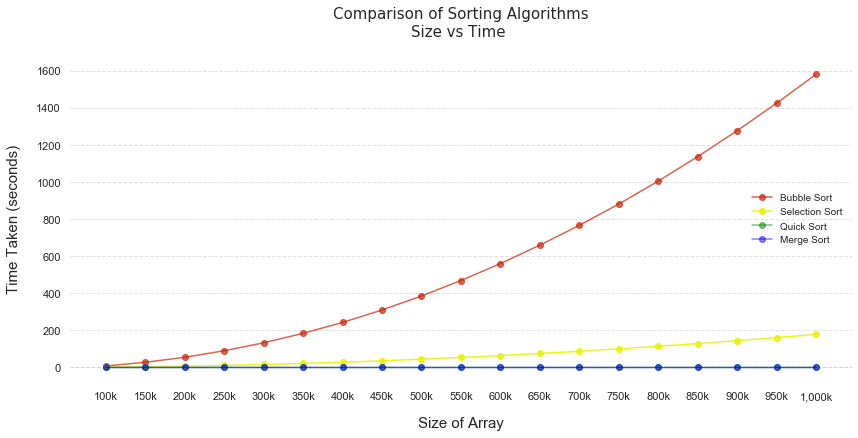

In [7]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=200,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=400,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=600,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=800,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1000,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1200,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1400,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1600,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.plot(df_time["Bubble Sort"],label="Bubble Sort",alpha=0.7,color="#cc2204",marker='o')
plt.plot(df_time["Selection Sort"],label="Selection Sort",alpha=0.9,color="#eaf20a",marker='o')
plt.plot(df_time["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_time["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')
labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=0,prop={'size':10},)
plt.title("Comparison of Sorting Algorithms\nSize vs Time ",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("Time Taken (seconds)",fontsize=15,labelpad=15)
plt.show()
# plt.savefig('Size_vs_Time.png')

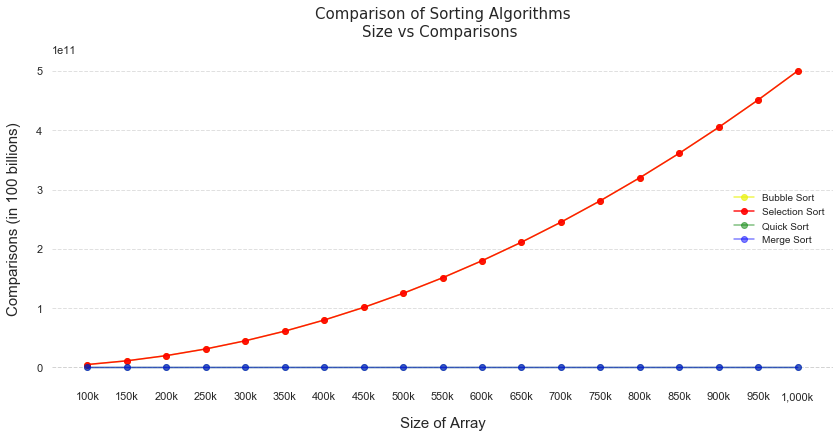

In [8]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=1e11,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=2e11,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=3e11,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=4e11,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=5e11,color='lightgrey',linestyle='--',lw=1,alpha=0.7)

plt.plot(df_comp["Bubble Sort"],label="Bubble Sort",alpha=0.7,color="#eaf20a",marker='o')
plt.plot(df_comp["Selection Sort"],label="Selection Sort",alpha=0.9,color="red",marker='o')
plt.plot(df_comp["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_comp["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')

labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':10})
plt.title("Comparison of Sorting Algorithms\nSize vs Comparisons ",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("Comparisons (in 100 billions)",fontsize=15,labelpad=15)
plt.ticklabel_format()
plt.show()
# plt.savefig("Size_vs_Comparisons.png")

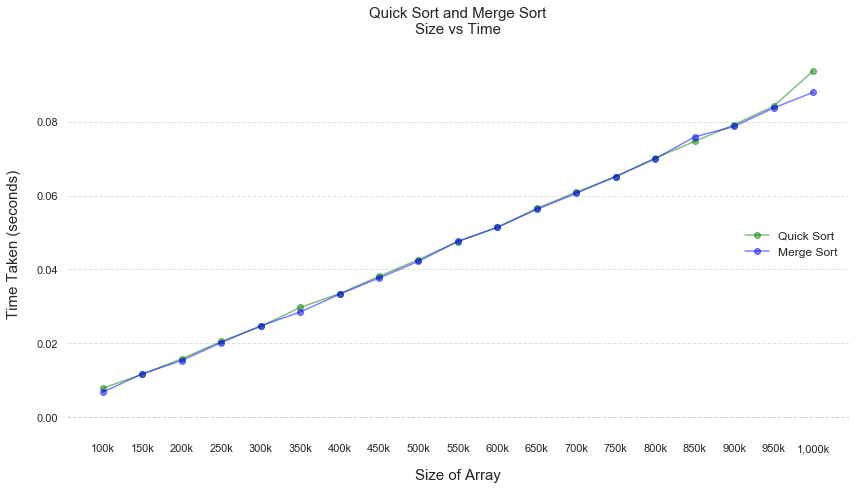

In [9]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,7))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=0.02,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=0.04,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=0.06,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=0.08,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.plot(df_time["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_time["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')
labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':12},)
plt.title("Quick Sort and Merge Sort\nSize vs Time",pad=20,fontsize=15)
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("Time Taken (seconds)",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("QM_Size_vs_Time.png")

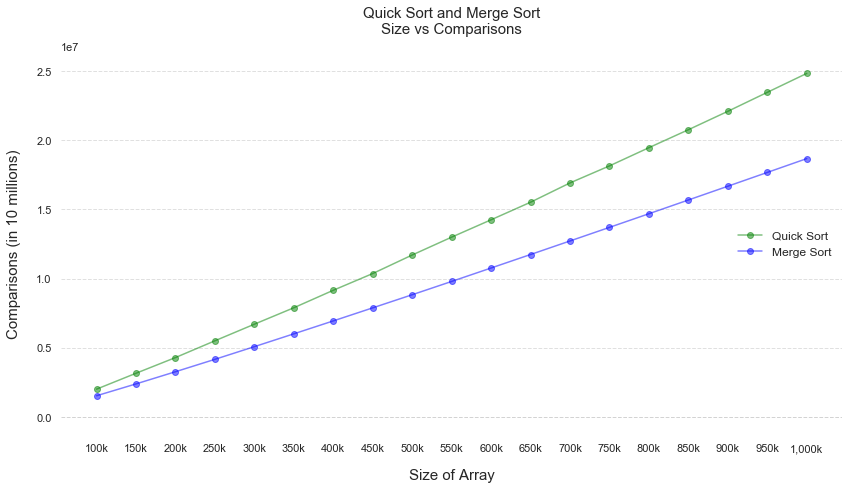

In [10]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,7))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=0.5e7,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1.0e7,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=1.5e7,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=2.0e7,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=2.5e7,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.plot(df_comp["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_comp["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')
labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':12},)
plt.title("Quick Sort and Merge Sort\nSize vs Comparisons",pad=20,fontsize=15)
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("Comparisons (in 10 millions)",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("QM_Size_vs_Comparisons.png")

In [11]:
df_percentage = df_time.copy()
df_percentage

,Bubble Sort,Selection Sort,Quick Sort,Merge Sort
100000,8.026042,1.785156,0.007812,0.006719
150000,27.947917,4.015625,0.011562,0.011719
200000,55.046875,7.140625,0.015781,0.015312
250000,90.125000,11.171875,0.020469,0.020156
300000,133.171875,16.083333,0.024531,0.024688
350000,184.187500,21.848958,0.029687,0.028438
400000,243.031250,28.520833,0.033438,0.033281
450000,310.250000,36.140625,0.038125,0.037656
500000,385.656250,44.562500,0.042656,0.042188
550000,469.187500,54.062500,0.047500,0.047656


In [12]:
df_percentage["Bubble Sort"] = 100 * (df_percentage["Bubble Sort"] - df_percentage["Bubble Sort"][1e5])/df_percentage["Bubble Sort"][1e5]
df_percentage["Selection Sort"] = 100 * (df_percentage["Selection Sort"] - df_percentage["Selection Sort"][1e5])/df_percentage["Selection Sort"][1e5]
df_percentage["Quick Sort"] = 100 * (df_percentage["Quick Sort"] - df_percentage["Quick Sort"][1e5])/df_percentage["Quick Sort"][1e5]
df_percentage["Merge Sort"] = 100 * (df_percentage["Merge Sort"] - df_percentage["Merge Sort"][1e5])/df_percentage["Merge Sort"][1e5]

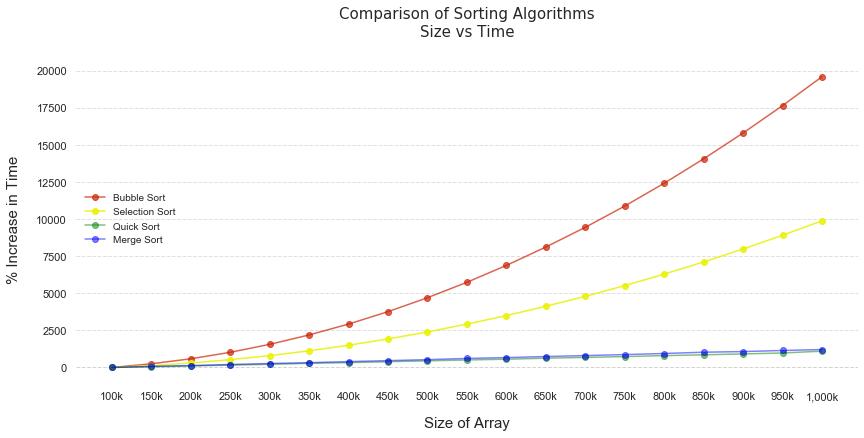

In [13]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=2500,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=5000,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=7500,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=10000,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=12500,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=15000,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=17500,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=20000,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.plot(df_percentage["Bubble Sort"],label="Bubble Sort",alpha=0.7,color="#cc2204",marker='o')
plt.plot(df_percentage["Selection Sort"],label="Selection Sort",alpha=0.9,color="#eaf20a",marker='o')
plt.plot(df_percentage["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_percentage["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')
labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=0,prop={'size':10},)
plt.title("Comparison of Sorting Algorithms\nSize vs Time",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("% Increase in Time",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("Size_vs_perTime.png")

In [14]:
df_percentage_comp = df_comp.copy()
df_percentage_comp["Bubble Sort"] = 100 * (df_percentage_comp["Bubble Sort"] - df_percentage_comp["Bubble Sort"][1e5])/df_percentage_comp["Bubble Sort"][1e5]
df_percentage_comp["Selection Sort"] = 100 * (df_percentage_comp["Selection Sort"] - df_percentage_comp["Selection Sort"][1e5])/df_percentage_comp["Selection Sort"][1e5]
df_percentage_comp["Quick Sort"] = 100 * (df_percentage_comp["Quick Sort"] - df_percentage_comp["Quick Sort"][1e5])/df_percentage_comp["Quick Sort"][1e5]
df_percentage_comp["Merge Sort"] = 100 * (df_percentage_comp["Merge Sort"] - df_percentage_comp["Merge Sort"][1e5])/df_percentage_comp["Merge Sort"][1e5]

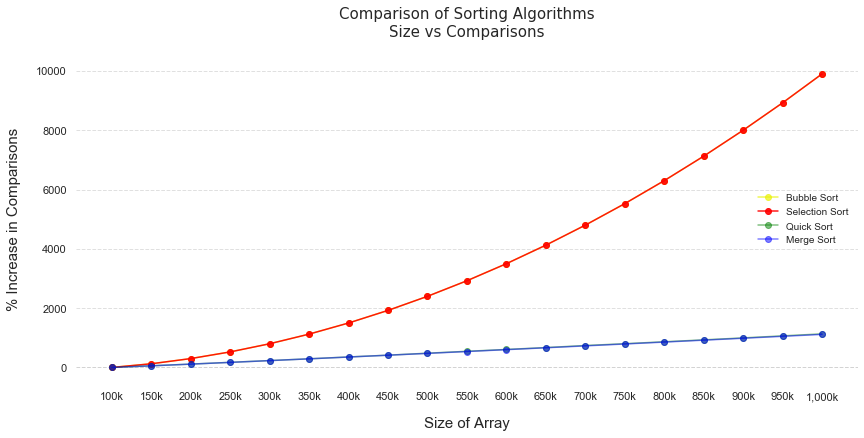

In [15]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=2e3,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=4e3,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=6e3,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=8e3,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=10e3,color='lightgrey',linestyle='--',lw=1,alpha=0.7)

plt.plot(df_percentage_comp["Bubble Sort"],label="Bubble Sort",alpha=0.7,color="#eaf20a",marker='o')
plt.plot(df_percentage_comp["Selection Sort"],label="Selection Sort",alpha=0.9,color="red",marker='o')
plt.plot(df_percentage_comp["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_percentage_comp["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')

labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':10})
plt.title("Comparison of Sorting Algorithms\nSize vs Comparisons",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("% Increase in Comparisons",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("Size_vs_perComparisons.png")

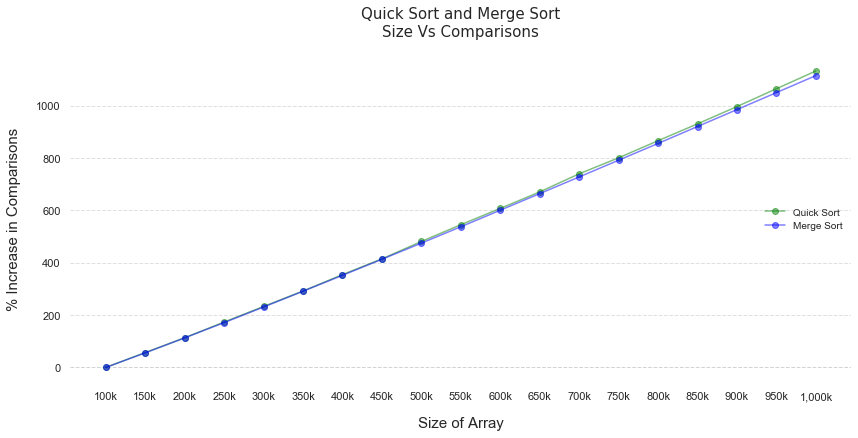

In [16]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=2e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=4e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=6e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=8e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=10e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)

plt.plot(df_percentage_comp["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_percentage_comp["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')

labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':10})
plt.title("Quick Sort and Merge Sort\nSize Vs Comparisons",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("% Increase in Comparisons",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("QM_Size_vs_perComparisons.png")

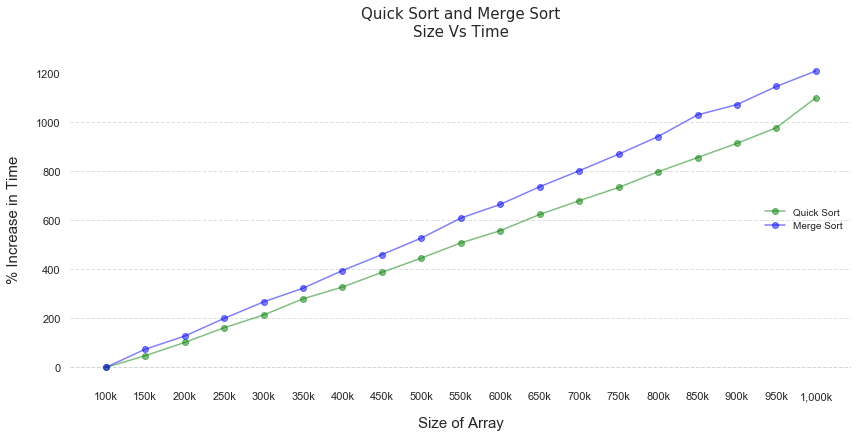

In [17]:
%matplotlib inline
sns.set()
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axhline(y=0,color='lightgrey',linestyle='--',lw=1,alpha=1)
plt.axhline(y=2e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=4e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=6e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=8e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)
plt.axhline(y=10e2,color='lightgrey',linestyle='--',lw=1,alpha=0.7)

plt.plot(df_percentage["Quick Sort"],label="Quick Sort",alpha=0.5,color="green",marker='o')
plt.plot(df_percentage["Merge Sort"],label="Merge Sort",alpha=0.5,color="blue",marker='o')

labels = np.arange(1e5,1e6+1,5e4).astype(int)
xlabels = ['{:,.0f}'.format(x) + 'k' for x in labels/1000]
locs = np.arange(1e5,1e6+1,5e4).astype(int)
plt.xticks(ticks=locs,labels=xlabels)
plt.legend(loc=5,prop={'size':10})
plt.title("Quick Sort and Merge Sort\nSize Vs Time",pad=20,fontsize=15,fontname="Times New Roman Bold")
plt.xlabel("Size of Array",fontsize=15,labelpad=15)
plt.ylabel("% Increase in Time",fontsize=15,labelpad=15)
plt.show()
# plt.savefig("QM_Size_vs_perTime.png")